In [37]:
import pandas as pd

In [38]:
# Leer el archivo CSV
df = pd.read_csv("./data/UK_foods.csv")

# Transponer el DataFrame
df_transposed = df.T

# Convertir la primera fila transpuesta en el encabezado y eliminarla del cuerpo del DataFrame
new_header = df_transposed.iloc[0]
df_transposed = df_transposed[1:]
df_transposed.columns = new_header

# Resetea el índice
df_transposed = df_transposed.reset_index()

# Cambiar el nombre de la nueva columna creada por el reset_index, si lo deseas
data = df_transposed.rename(columns={"index": "Country"})


# Opcional: Guardar el DataFrame transpuesto en un nuevo archivo CSV
# df_transposed.to_csv('archivo_transpuesto.csv', index=False)

data.head()

Product,Country,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [39]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import pandas as pd  # Asegúrate de importar pandas ya que es necesario para manipulación de datos.

# Definición de las dimensiones de entrada y codificadas
input_dim = 17
encoding_dim = 2

# Definición del encoder
input_layer = keras.layers.Input(shape=(input_dim,))
encoded = keras.layers.Dense(encoding_dim, activation='relu')(input_layer)

# Definición del decoder
decoded = keras.layers.Dense(input_dim, activation='sigmoid')(encoded)

# Creación del modelo de autoencoder completo
autoencoder = keras.models.Model(input_layer, decoded)

# Creación del modelo de encoder
encoder = keras.models.Model(input_layer, encoded)


In [40]:
# Compilación del modelo
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Normalización de datos y preparación de etiquetas
scaler = MinMaxScaler()
labels = data["Country"].values
data = data.drop("Country", axis=1)
data_normalized = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

x_train = data_normalized.values
x_train = x_train.astype('float32')

# Entrenamiento del modelo
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_train, x_train))


Epoch 1/50


1/1 [==============================] - 1s 1s/step - loss: 0.1634 - val_loss: 0.1632
Epoch 2/50
1/1 [==============================] - 0s 63ms/step - loss: 0.1632 - val_loss: 0.1630
Epoch 3/50
1/1 [==============================] - 0s 62ms/step - loss: 0.1630 - val_loss: 0.1628
Epoch 4/50
1/1 [==============================] - 0s 57ms/step - loss: 0.1628 - val_loss: 0.1626
Epoch 5/50
1/1 [==============================] - 0s 62ms/step - loss: 0.1626 - val_loss: 0.1624
Epoch 6/50
1/1 [==============================] - 0s 59ms/step - loss: 0.1624 - val_loss: 0.1622
Epoch 7/50
1/1 [==============================] - 0s 63ms/step - loss: 0.1622 - val_loss: 0.1620
Epoch 8/50
1/1 [==============================] - 0s 63ms/step - loss: 0.1620 - val_loss: 0.1618
Epoch 9/50
1/1 [==============================] - 0s 62ms/step - loss: 0.1618 - val_loss: 0.1616
Epoch 10/50
1/1 [==============================] - 0s 62ms/step - loss: 0.1616 - val_loss: 0.1614
Epoch 11/50
1/1 [=========================

In [41]:
# Realización de predicciones y cálculo de errores de reconstrucción
reconstructed_data = autoencoder.predict(x_train)
reconstruction_error_per_instance = np.mean(np.square(x_train - reconstructed_data), axis=1)
mean_reconstruction_error = np.mean(reconstruction_error_per_instance)

# Visualización de los datos codificados
encoded_data = encoder.predict(x_train)
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

print(reconstruction_error_per_instance)
print(mean_reconstruction_error)


1/1 [==============================] - 0s 73ms/step
[0.05448797 0.21207608 0.12411033 0.22832644]
0.1547502


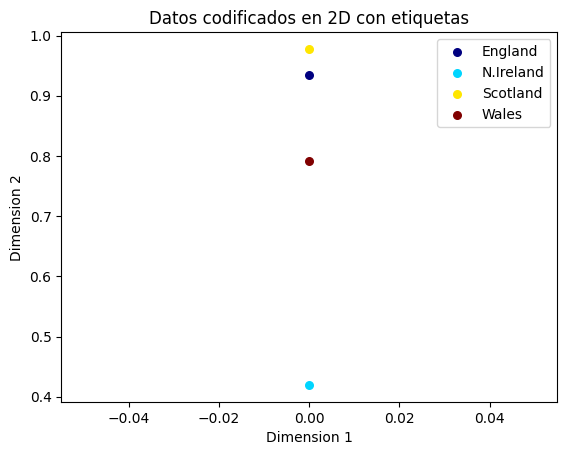

In [42]:
import matplotlib.pyplot as plt  # Asegúrate de importar matplotlib para la visualización.

unique_labels = np.unique(encoded_labels)
colors = plt.cm.jet(np.linspace(0, 1, len(unique_labels)))

for i, label in enumerate(unique_labels):
    subset = encoded_data[encoded_labels == label]
    plt.scatter(subset[:, 0], subset[:, 1], s=30, c=[colors[i]], label=label_encoder.inverse_transform([label])[0])

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Datos codificados en 2D con etiquetas')
plt.legend()
plt.show()